In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/Users/ryanshiz/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
from pandas.io.data import DataReader
# Scrapes stocks from internet

In [4]:
from datetime import datetime

In [5]:
from __future__ import division

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [8]:
for stock in tech_list :
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
    
# globals()[X] assigns stock string as a global variable (dataframe in this case)

[<matplotlib.text.Text at 0x1005350d0>, <matplotlib.text.Text at 0x10e5d9410>]

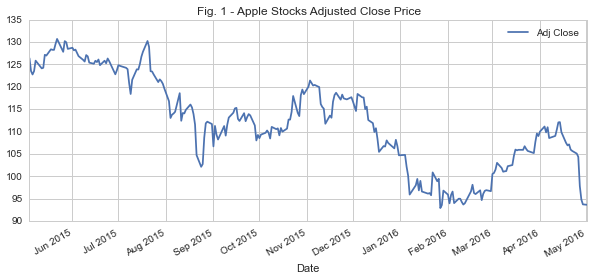

In [9]:
ax = AAPL['Adj Close'].plot(legend=True, figsize=(10,4))
ax.set(xlabel='Date', title='Fig. 1 - Apple Stocks Adjusted Close Price')

The adjusted close position of Apple stocks over the past year.

[<matplotlib.text.Text at 0x10e81f210>, <matplotlib.text.Text at 0x10e863d50>]

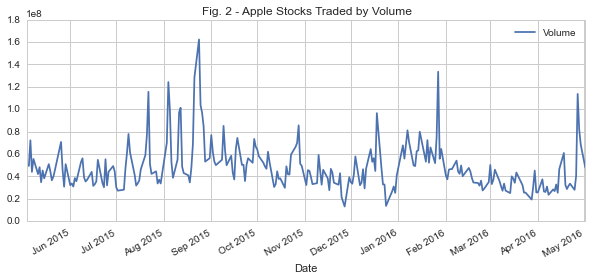

In [10]:
ax = AAPL['Volume'].plot(legend=True, figsize=(10,4))
ax.set(xlabel='Date', title='Fig. 2 - Apple Stocks Traded by Volume')

The volume of Apple stocks traded over the past year.

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day :
    column_name = "MA for %d days" % ma
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)
    
# Insert a column for 10, 20 and 50 point moving averages

[<matplotlib.text.Text at 0x10e859950>, <matplotlib.text.Text at 0x10e9f87d0>]

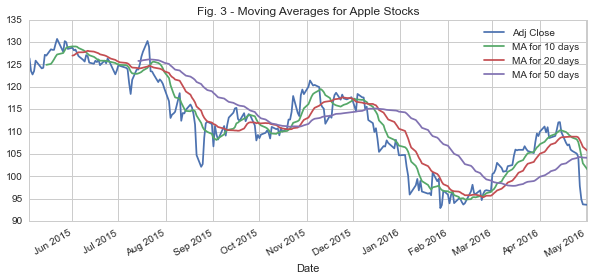

In [12]:
ax = AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))
ax.set(xlabel='Date', title='Fig. 3 - Moving Averages for Apple Stocks')

In [13]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# % change is already a pandas method

[<matplotlib.text.Text at 0x10e808610>, <matplotlib.text.Text at 0x10ed25fd0>]

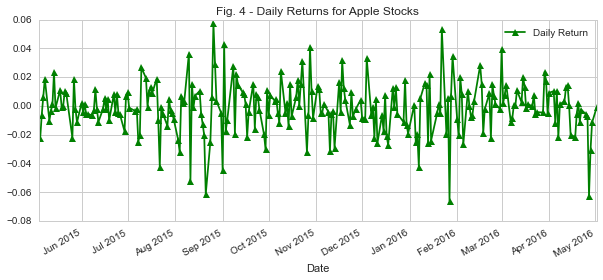

In [14]:
ax = AAPL['Daily Return'].plot(figsize=(10,4), legend=True, color='green',linestyle='-', marker='^')
ax.set(xlabel='Date', title='Fig. 4 - Daily Returns for Apple Stocks')

Daily returns as a plot is too messy and close to net zero.

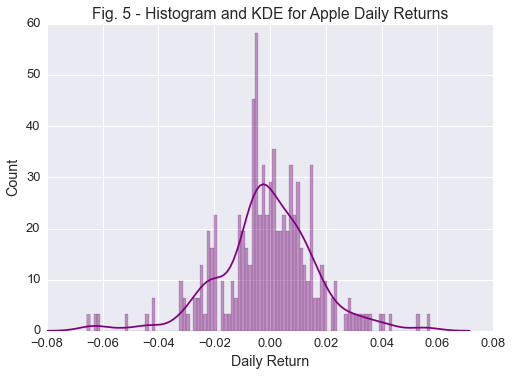

In [15]:
sns.set(rc={"figure.figsize": (10, 4)})
sns.set(font_scale=1.3)
ax = sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')
ax.set(xlabel='Daily Return', ylabel='Count', title='Fig. 5 - Histogram and KDE for Apple Daily Returns')

Daily returns as a distribution/histogram is more informative. We can see the modal value is below zero, but the distribution seems skewed in the positive direction.

In [16]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
# One dataframe for all tech_list companies, adj close data

In [17]:
tech_rets = closing_df.pct_change()

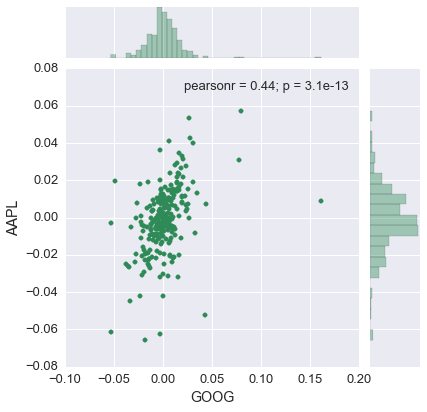

In [18]:
sns.jointplot(x='GOOG', y='AAPL', data=tech_rets, kind='scatter', color='seagreen')

A joint scatterplot for Google and Apple daily returns.

N.B. (|r| < 0.3) -> weak correlation; (0.3 < |r| < 0.5) -> medium correlation; (|r| > 0.5) -> strong correlation.

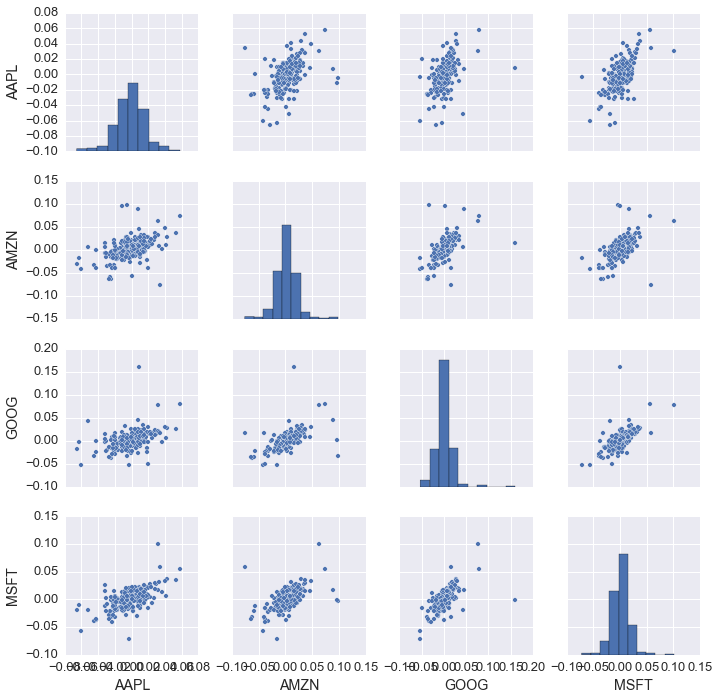

In [19]:
sns.pairplot(tech_rets.dropna())

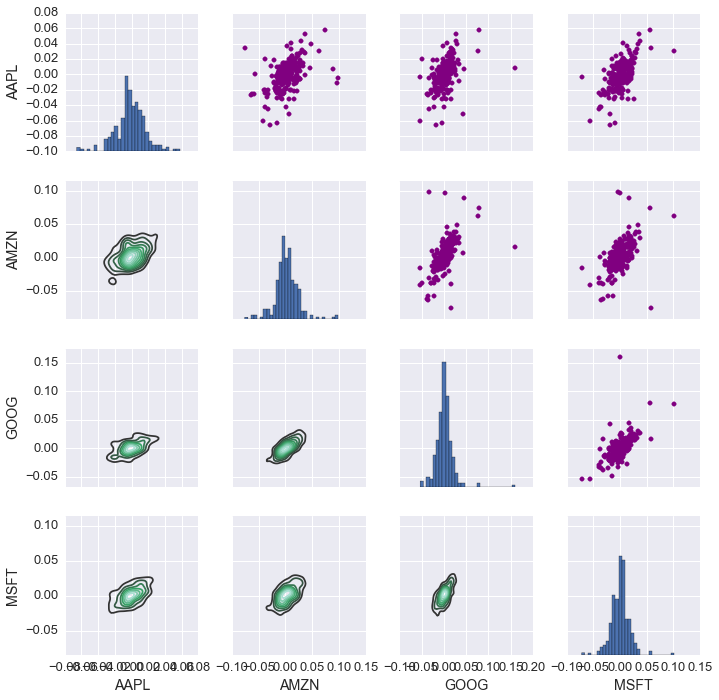

In [20]:
fig = sns.PairGrid(tech_rets.dropna())
fig.map_upper(plt.scatter, color='purple')
fig.map_lower(sns.kdeplot, color='hlr')
fig.map_diag(plt.hist, bins=30)

pairplot is nice and easy scatterplots for all columns in a dataframe (diag is histogram), whilst PairGrid is more customisable. corrplot explicitly calculates the coefficients.

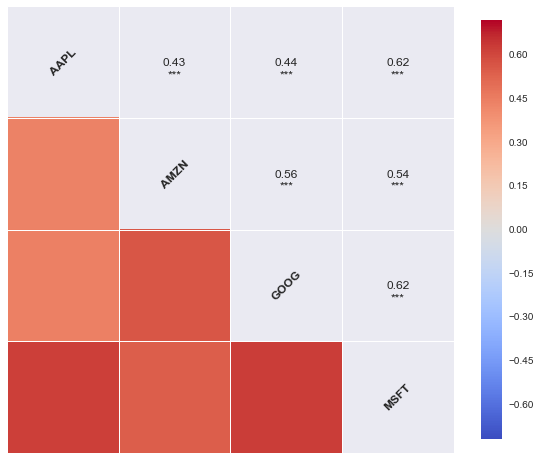

In [23]:
sns.corrplot(tech_rets.dropna(), annot=True)
sns.set(rc={"figure.figsize": (10, 10)})

Apple and Microsoft have the highest degree of correlation (but all four stocks have positive medium correlation).

### Risk Analysis

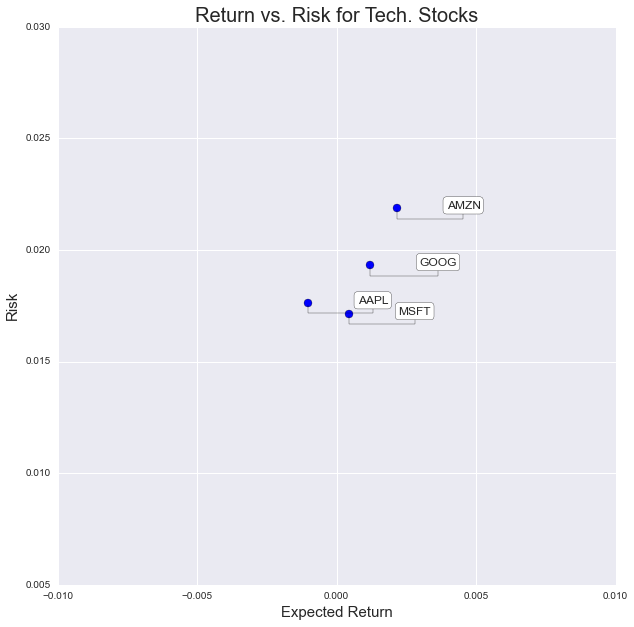

In [50]:
rets = tech_rets.dropna()
area = np.pi*20.0

plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Tech. Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))


We see that Amazon gives both the best average return and the highest risk. Apple has an average return of less than zero (not good!)

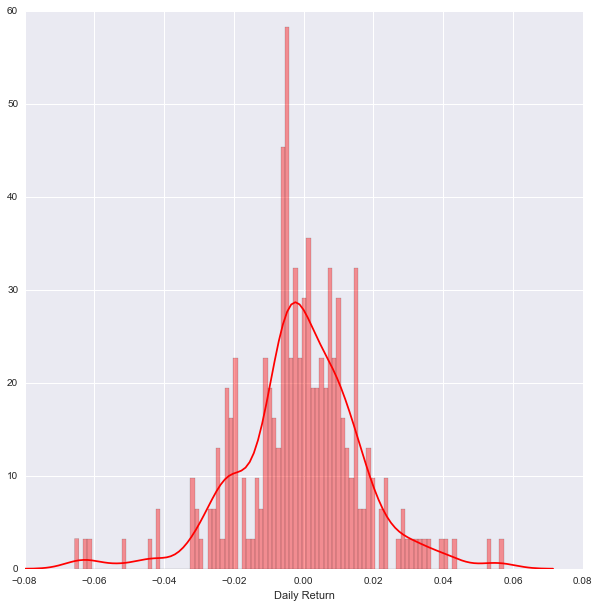

In [52]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='red')
sns.set(rc={"figure.figsize": (7, 7)})

In [53]:
rets.quantile(0.05)

AAPL   -0.028139
AMZN   -0.032818
GOOG   -0.023460
MSFT   -0.024812
dtype: float64

In [54]:
rets.quantile(0.95)

AAPL    0.027278
AMZN    0.031677
GOOG    0.025367
MSFT    0.023150
dtype: float64

The worst 5% of results, lose 2.8% for Apple. I.e. the '5% Value at Risk' is 2.8%. On the other hand, the best 5% of results only give you a gain of 2.7%, so the distribution is skewed somewhat. As seen in the risk scatterplot, Amazon has the highest risk.

### Monte Carlo Approach

The geometric Brownian motion model:

<a href="https://www.codecogs.com/eqnedit.php?latex=\large&space;\Delta&space;S&space;=&space;S(\mu\Delta&space;t&space;&plus;&space;\sigma\epsilon&space;\sqrt[]{\Delta&space;t})" target="_blank"><img src="https://latex.codecogs.com/gif.latex?\large&space;\Delta&space;S&space;=&space;S(\mu\Delta&space;t&space;&plus;&space;\sigma\epsilon&space;\sqrt[]{\Delta&space;t})" title="\large \Delta S = S(\mu\Delta t + \sigma\epsilon \sqrt[]{\Delta t})" /></a>

N.B. Use https://www.codecogs.com/latex/eqneditor.php for formulae.

S is the change in share price, mu is the expected return, t is time, sigma is standard deviation of returns, epsilon is a random number. The first term is a deterministic 'drift' term, the second is a stochastic 'shock' term.

In [58]:
days=365
dt=1/days # dt is one day
mu=rets.mean()['GOOG']
sigma=rets.std()['GOOG']

In [132]:
def stock_monte_carlo(start_price, days, mu, sigma) :
    
    price=np.zeros(days)
    price[0] = start_price
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in xrange(1, days) :
        drift[x]=mu*dt
        shock[x]=np.random.normal(loc=0.0, scale=sigma*np.sqrt(dt))
        
        price[x] = price[x-1] + price[x-1]*(drift[x] + shock[x])
        
    return price

In [133]:
np.random.normal(loc=10, scale=1.0, size=10)

array([ 11.21638034,   9.80914391,   8.63730339,  10.31059222,
         8.73624729,  10.68365873,  10.68857146,  11.0263558 ,
         8.96484456,  11.4311476 ])

In [134]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-05-04,538.530029,544.070007,535.059998,540.780029,1308000,540.780029
2015-05-05,538.210022,539.739990,530.390991,530.799988,1383100,530.799988
2015-05-06,531.239990,532.380005,521.085022,524.219971,1567000,524.219971
2015-05-07,523.989990,533.460022,521.750000,530.700012,1546300,530.700012
2015-05-08,536.650024,541.150024,525.000000,538.219971,1527600,538.219971


In [135]:
start_price = 538.530029

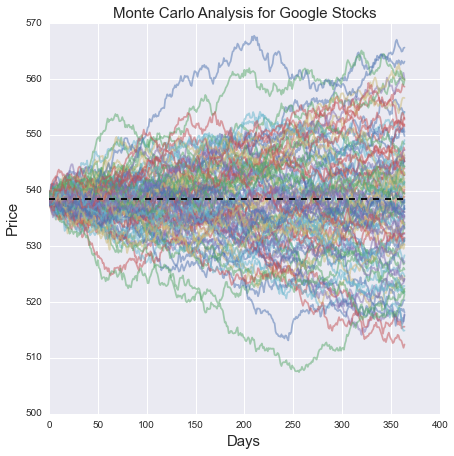

In [136]:
for i in range(100) :
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), alpha=0.5)
plt.plot([0, 365], [start_price, start_price], 'k--')
plt.xlabel("Days", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Monte Carlo Analysis for Google Stocks", fontsize=15)

In [137]:
runs = 10000
simulations=np.zeros(runs)

for run in range(runs) :
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]


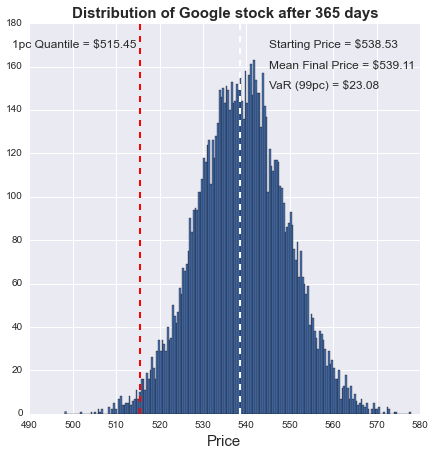

In [157]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.60, 0.85, s="Starting Price = $%.2f" % start_price)
plt.figtext(0.60, 0.81, s="Mean Final Price = $%.2f" % simulations.mean())
plt.figtext(0.60, 0.77, s="VaR (99pc) = $%.2f" % (start_price-q))
plt.figtext(0.09, 0.85, s="1pc Quantile = $%.2f" % q)

plt.axvline(x=q, linewidth=2, color='r', linestyle='--')
plt.axvline(x=start_price, linewidth=2, color='w', linestyle='--')

plt.xlabel("Price", fontsize=15)
plt.title("Distribution of Google stock after %d days" % days, weight='bold', fontsize=15)

In [130]:
mu

0.001198933559613557

In [131]:
sigma

0.019321393066936258